# Find the Best Two Markets to Advertise In

There is an e-learning company that offers courses on programming. Most of its courses are on web and mobile development, but also cover many other domains, like data science, game development, etc. Need to promote product and to invest some money in advertisement. The goal is to find out the two best markets to advertise our product in.

## Understand the Data

To reach the goal, can try to search existing data that might be relevant for the purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey ([link](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969?gi=6cbf59b482cf)). freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of analysis.

The survey data is publicly available in this GitHub repository ([link](https://github.com/freeCodeCamp/2017-new-coder-survey)).

In [3]:
import pandas as pd

survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

# look at number of rows and columns:
print('number of rows: ', survey_data.shape[0])
print('number of columns: ', survey_data.shape[1])

number of rows:  18175
number of columns:  136


In [4]:
# print the first five rows
survey_data.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# list of all columns:
pd.Series(survey_data.columns)

0                                Age
1                   AttendedBootcamp
2                     BootcampFinish
3                  BootcampLoanYesNo
4                       BootcampName
5                  BootcampRecommend
6                     ChildrenNumber
7                     CityPopulation
8               CodeEventConferences
9               CodeEventDjangoGirls
10                      CodeEventFCC
11                  CodeEventGameJam
12                  CodeEventGirlDev
13               CodeEventHackathons
14                   CodeEventMeetup
15               CodeEventNodeSchool
16                     CodeEventNone
17                    CodeEventOther
18              CodeEventRailsBridge
19               CodeEventRailsGirls
20              CodeEventStartUpWknd
21             CodeEventWkdBootcamps
22                CodeEventWomenCode
23                CodeEventWorkshops
24                       CommuteTime
25                    CountryCitizen
26                       CountryLive
2

It does not clear what the meaning of each column, though they have quite cleare names. Let's look at some published stattistic to idetify meaning of the columns by the questions from survey ([link](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969)). Let's look through main questions to find relevant columns for the purpose of our analysis.

The survey is about:

* Who participated?
* Learner goals and approaches
* Learning resources
* Demographics and Socioeconomics

It is a good source to work with to gain the goal of the analysis: want to answer questions about a population of new coders that are interested in the subjects of the e-learning company (which offer courses on web and mobile development, but also cover many other domains, like data science, game development, etc.). So the goal is to know:

* Where are these new coders located?
* What are the locations with the greatest number of new coders?
* How much money new coders are willing to spend on learning?

## Check for Sample Representativity

Before starting to analyze the sample data, need to clarify whether it's representative for the population of interest and it has the right categories of people for the purpose of the analysis.

The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working. Generate a frequency distribution table for this column:

In [31]:
survey_data['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

The information in the table above is quite granular, but from a quick scan it looks like:

* a lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
* a few people are interested in mobile development.
* a few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests.

In [32]:
# split each string in the 'JobRoleInterest' column
interests = survey_data['JobRoleInterest'].dropna()
splitted_interests = interests.str.split(',')

splitted_interests

1                                                                                                                                                                                                                                                                                    [Full-Stack Web Developer]
2                                                                                                                                                                                    [  Front-End Web Developer,  Back-End Web Developer,    DevOps / SysAdmin,    Mobile Developer,  Full-Stack Web Developer]
3                                                                                                                                                                                                                               [  Front-End Web Developer,  Full-Stack Web Developer,  Back-End Web Developer]
4                                                                                       

In [30]:
# frequency table for the var describing the number of options
splitted_interests['options_count'] = splitted_interests.apply(lambda x: len(x))
splitted_interests['options_count'].value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.7% of the participants have one role in mind, while the vast majority of students have mixed interests. But given that the e-lerning company offer courses on various subjects, the fact that new coders have mixed interest will be good for advertisement purposes.

The focus of courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [45]:
web_or_mobile = interests.str.contains("Web Developer|Mobile Developer")
freq = web_or_mobile.value_counts(normalize=True) * 100
freq

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

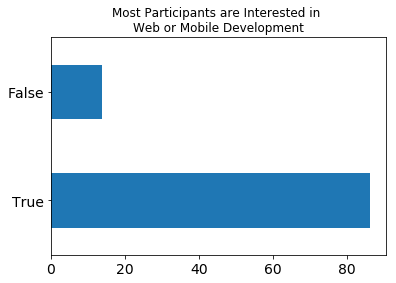

In [51]:
freq.plot.barh(title='Most Participants are Interested in \nWeb or Mobile Development', fontsize=14)

Most people are interested in either web or mobile development. Tis is a strong reason to consider this sample representative for population of interest.

Now need to figure out what are the best markets to invest money in for advertising our courses. To know:

* Where are these new coders located?
* What are the locations with the greatest number of new coders?
* How much money new coders are willing to spend on learning?

## Find Locations and Densities For New Coders

Let's look at where potential customers (New Coders) live. Consider to choose two most populated countries with new Coders to usw this countries for two markets where place advertisement.

Drop all the rows where participants didn't answer what role they are interested in. To make sure the sample is representatuve.

In [58]:
survey_data_new = survey_data[survey_data['JobRoleInterest'].notnull()].copy()

# generate a frequency table for the CountryLive variable
absolute_freq_country = survey_data_new['CountryLive'].value_counts()
relative_freq_country = survey_data_new['CountryLive'].value_counts(normalize=True)*100

pd.DataFrame(data = {"absolute": absolute_freq_country, 
                     "relative": relative_freq_country})

,absolute,relative
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The first best market is USA - about 45.7%. The second can be chosen among India (7.7%), United Kingdom (4.6%) and Canada (3.8%). They have close percentage, so neet to look deeper at other characteristics, that can help to make better decision. Let's look at how much people are willing to learn for free. It will not give any profit.

## Spend Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. E-learning company sells subscriptions at a price of $59 per month, and for this reason neet to find out how much money each student spends per month.

Narrow down sample to only four countries: the US, India, the United Kingdom, and Canada. There is one more reason - this countries know and speak English.

Use `MoneyForLearning` and `MonthsProgramming` columns to calculate money spend per month.

In [90]:
survey_data_4_countries = survey_data_new[survey_data_new['CountryLive'].isin(
    ['United States of America', 'India', 'United Kingdom', 'Canada'])].copy()
survey_data_4_countries['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

In [91]:
# to avoid dividing by 0, replace all the values of 0 with 1:
survey_data_4_countries['MonthsProgramming'].replace(0,1,inplace=True)
survey_data_4_countries['money_per_month'] = (
    survey_data_4_countries['MoneyForLearning']/survey_data_4_countries['MonthsProgramming'])

# keep only the rows that don't have null values for the money_per_month column
survey_data_4_countries = survey_data_4_countries[survey_data_4_countries['money_per_month'].notnull()].copy()

# drequency table to check if we still have enough data
survey_data_4_countries['CountryLive'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

Group the remaining data by the CountryLive column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [92]:
survey_data_4_countries[['money_per_month', 'CountryLive']].groupby('CountryLive').mean().sort_values(
    by=['money_per_month'], ascending=False)

,money_per_month
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


India has higher value of money per month ans it is not expected, because if think about socio-economical metrics (like GDP per capita) should expect people in United Kingdom and Canade to spend more money.

It can be the reason of ouliers in dataset.

## Deal with Extreme Outliers

Generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

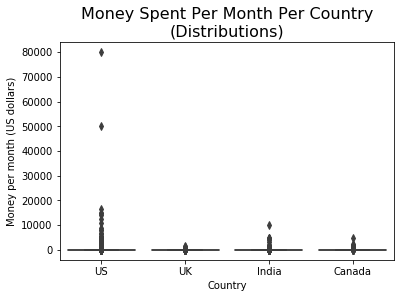

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = 'CountryLive', y = 'money_per_month',
             data = survey_data_4_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There are extreme outliers in United Sates need to be deleted.

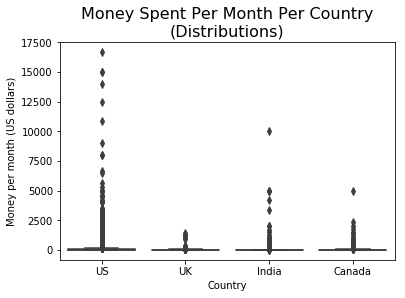

In [94]:
survey_data_4_countries = survey_data_4_countries[survey_data_4_countries['money_per_month'] < 20000].copy()
sns.boxplot(x = 'CountryLive', y = 'money_per_month',
             data = survey_data_4_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There are few extreme outliers for India (values over \$2500 per month). Let's examine these datato see if can find anything relevant.

In [96]:
india_ouliers = survey_data_4_countries[(
    survey_data_4_countries['CountryLive'] == 'India') &
    (survey_data_4_countries['money_per_month'] > 2500)].copy()
india_ouliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,...,in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,...,no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 m

It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these rows.

In [97]:
survey_data_4_countries = survey_data_4_countries.drop(india_ouliers.index)

In [100]:
# outliers in USA
usa_ouliers = survey_data_4_countries[(
    survey_data_4_countries['CountryLive'] == 'United States of America') &
    (survey_data_4_countries['money_per_month'] > 5000)].copy()
usa_ouliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,...,in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,...,in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,bachelor's degree,

High amount of money can be the reason of bootcamps. Other people no have a good reason to spend a lot of money - it may be error. Also need to delete people who learned less the 3 months. It may be the reason of high amount of money per month - they paid in the beginning and do not finish learning yet.

In [101]:
usa_ouliers = survey_data_4_countries[(
    survey_data_4_countries['CountryLive'] == 'United States of America') &
    (survey_data_4_countries['money_per_month'] > 5000) &
    (survey_data_4_countries['AttendedBootcamp'] == 0)].copy()

survey_data_4_countries = survey_data_4_countries.drop(usa_ouliers.index)

usa_ouliers = survey_data_4_countries[(
    survey_data_4_countries['CountryLive'] == 'United States of America') &
    (survey_data_4_countries['money_per_month'] > 5000) &
    (survey_data_4_countries['MonthsProgramming'] <= 3)].copy()

survey_data_4_countries = survey_data_4_countries.drop(usa_ouliers.index)

In [102]:
# outliers in Canada
canada_ouliers = survey_data_4_countries[(
    survey_data_4_countries['CountryLive'] == 'Canada') &
    (survey_data_4_countries['money_per_month'] > 3000)].copy()
canada_ouliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,...,from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This person had been learning for no more than two months when he completed the survey. Need to be deleted.

In [103]:
survey_data_4_countries = survey_data_4_countries.drop(canada_ouliers.index)

In [104]:
survey_data_4_countries[['money_per_month', 'CountryLive']].groupby('CountryLive').mean().sort_values(
    by=['money_per_month'], ascending=False)

,money_per_month
CountryLive,
United States of America,138.982678
Canada,93.065400
India,65.758763
United Kingdom,45.534443


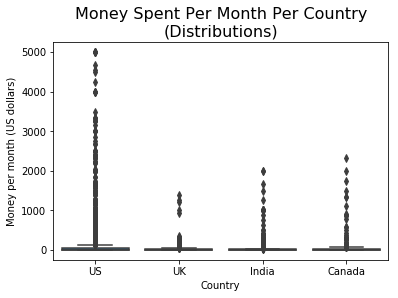

In [105]:
sns.boxplot(x = 'CountryLive', y = 'money_per_month',
             data = survey_data_4_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choose the Two Best Markets

The first best market should be United States of America. The second one may be Canada or India. I do not consider United Kingdom any more.

Even though Canada have higher value for money per month in comparison with India. Should look at amount of customers in this countries.

In [107]:
survey_data_4_countries['CountryLive'].value_counts(normalize=True)*100

United States of America    74.955048
India                       11.739019
United Kingdom               7.166709
Canada                       6.139224
Name: CountryLive, dtype: float64

India has almost twice as big market as Canada. If it is possible to split advertisement money on an unequal parts all three countries can be chosen, or two with not equal money to spend. For example 30% for Canada and 70% for USA, or 40% for India and 60% for USA etc.